# Домашнее задание №3

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

In [2]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


In [3]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


# 1
Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin. Построить график. Строим прямую с помощью уравнения которое мы посчитали. Предсказать несколько элементов из таблицы с помощью метода predict() и сравнить с результатом табличным.

In [4]:
from sklearn.linear_model import LinearRegression
direct_bilirubin = data['Direct_Bilirubin']
total_bilirubin = data['Total_Bilirubin']
model = LinearRegression()
result = model.fit(np.array(direct_bilirubin).reshape(-1,1), total_bilirubin)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 0.42502700059429843
slope: [1.93375953]


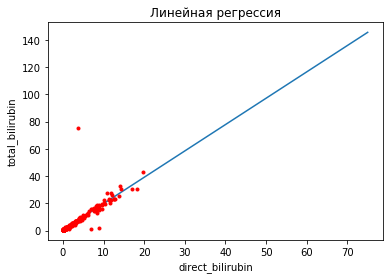

In [5]:
plt.xlabel('direct_bilirubin')
plt.ylabel('total_bilirubin')
plt.title('Линейная регрессия')
x = np.linspace(min(direct_bilirubin), max(total_bilirubin), 100)
y = model.coef_*x + model.intercept_
plt.plot(x,y)
plt.plot(direct_bilirubin, total_bilirubin, 'r.')
plt.show()

In [6]:
model.predict(np.array([0.1, 4.1, 5.5, 0.4, 2]).reshape(-1, 1))

array([ 0.61840295,  8.35344108, 11.06070443,  1.19853081,  4.29254606])

Прогнозные значения достаточно близки к фактическим. По трем показаниям среднее отклонение составило 12%.

# 2
Построить многомерную линейную регрессию для предсказания болезни (Dataset) от двух параметров. Параметры подобрать с помощью матрицы корреляций. Предсказать несколько значений из таблицы и сравнить результат модели от табличного значения.

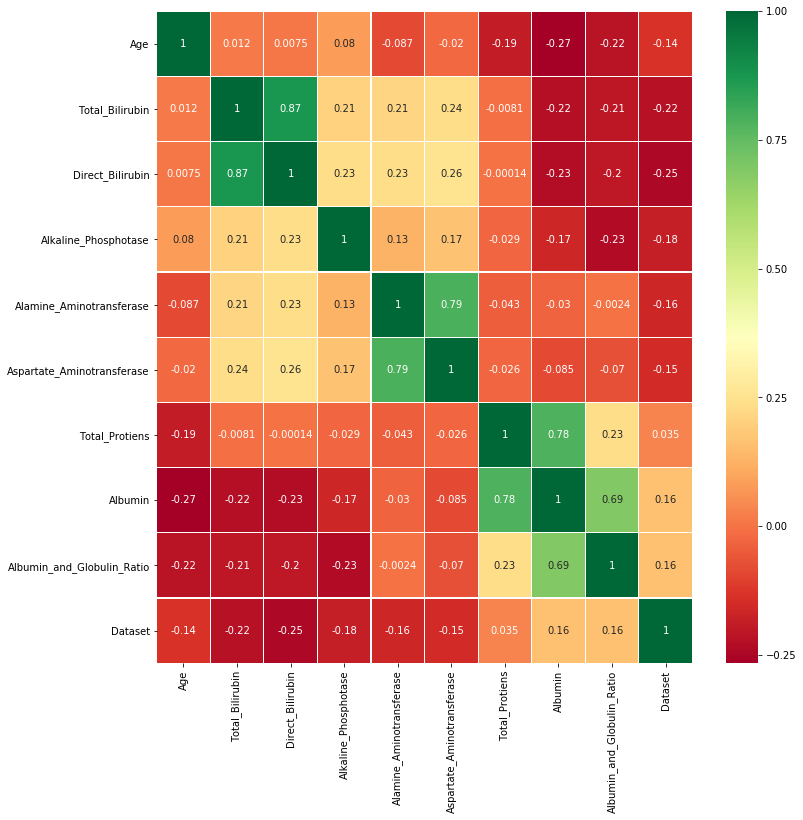

In [7]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [8]:
#data.isnull().sum()

По матрице корреляций заметно, что связи Dataset со всеми переменными недостаточно сильные. выбираем показатели с наибольшим значеием коэффициента : Direct bilirubin и Alkaline_Phosphotase. Total bilirubin в модель не включаем по причине мультиколлинеарности с Direct bilirubin.

In [9]:
alkaline_phosphotase = data['Alkaline_Phosphotase']
sick = data['Dataset']
x = np.vstack([np.array(direct_bilirubin), np.array(alkaline_phosphotase)]).T
print('x - это двумерная матрица, где колонки - это direct_bilirubin и alkaline_phosphotase : ')
print(x[:3])
y = np.array(sick)
model = LinearRegression().fit(x, y)

x - это двумерная матрица, где колонки - это direct_bilirubin и alkaline_phosphotase : 
[[1.00e-01 1.87e+02]
 [5.50e+00 6.99e+02]
 [4.10e+00 4.90e+02]]


In [10]:
print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 1.4105809528676787
slope: [-0.03455122 -0.00025048]


Связь sick с обоими показаетлями слабая. Зависимость обратная.

In [11]:
print('Предсказание модели: ', model.predict(x[0:10]))

Предсказание модели:  [1.3602853  1.04546081 1.14618371 1.35117235 1.2926341  1.3342944
 1.36509615 1.34961779 1.34961779 1.33103031]


По данным data для 9го пациента Dataset = 2. Модель неверно спрогнозилровала данное значение.

# 3
Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

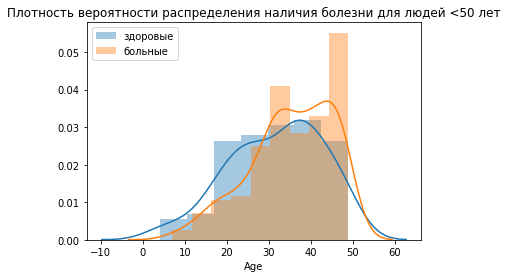

Средний возраст здоровых людей = 31.651785714285715
Средний возраст больных людей = 35.356846473029044
Квартиль 0,5 здоровых людей =  0.5    34.0
Name: Age, dtype: float64 
Квартиль 0,5 больных людей =  0.5    37.0
Name: Age, dtype: float64 


In [12]:
non_sick = data[ (data['Age'] < 50) & (data['Dataset'] == 2)]['Age']
sick = data[ (data['Age'] < 50) & (data['Dataset'] == 1)]['Age']
sns.distplot(non_sick)
sns.distplot(sick)
plt.title('Плотность вероятности распределения наличия болезни для людей <50 лет')
plt.legend(['здоровые', 'больные'])
plt.show()

print(f'Средний возраст здоровых людей = {non_sick.mean()}')
print(f'Средний возраст больных людей = {sick.mean()}')

print(f'Квартиль 0,5 здоровых людей =  {non_sick.quantile([.5])} ')
print(f'Квартиль 0,5 больных людей =  {sick.quantile([.5])} ')


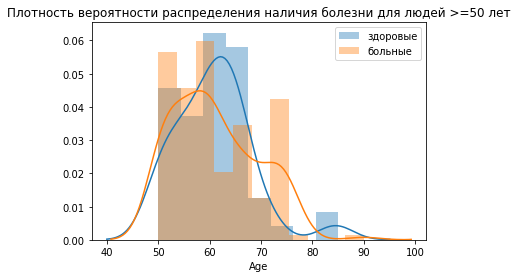

Средний возраст здоровых людей = 60.763636363636365
Средний возраст больных людей = 61.02285714285714
Квартиль 0,5 здоровых людей =  0.5    60.0
Name: Age, dtype: float64 
Квартиль 0,5 больных людей =  0.5    60.0
Name: Age, dtype: float64 


In [13]:
non_sick = data[ (data['Age'] >= 50) & (data['Dataset'] == 2)]['Age']
sick = data[ (data['Age'] >= 50) & (data['Dataset'] == 1)]['Age']
sns.distplot(non_sick)
sns.distplot(sick)
plt.title('Плотность вероятности распределения наличия болезни для людей >=50 лет')
plt.legend(['здоровые', 'больные'])
plt.show()

print(f'Средний возраст здоровых людей = {non_sick.mean()}')
print(f'Средний возраст больных людей = {sick.mean()}')

print(f'Квартиль 0,5 здоровых людей =  {non_sick.quantile([.5])} ')
print(f'Квартиль 0,5 больных людей =  {sick.quantile([.5])} ')


Среди людей моложе 50 лет наблюдается средний возраст и 0,5квартиль различаются для здоровых и больных людей. Среди людей старше 50 лет средний возраст и 0,5квартиль практически  идентичны для здоровых и больных людей.

# 4
Посчитать квартили для всех колонок. 

In [14]:
data.quantile([.10, .25, .50, .75], axis = 0) 


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.10,23.0,0.7,0.1,150.0,18.0,19.0,5.1,2.0,0.546,1.0
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.700,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.930,1.0
0.75,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.100,2.0


# 5
Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [15]:
sick_total_bilirubin  = data[data['Dataset'] == 1]['Total_Bilirubin']
print(stats.ttest_1samp(sick_total_bilirubin, data['Total_Bilirubin'].mean()))
#print(len(sick_total_bilirubin), round(len(sick_total_bilirubin)/(len(data))*100,1))
#print(len(data))

Ttest_1sampResult(statistic=2.471063305746647, pvalue=0.013871861207640042)


T-значение = 2.5.
p-value = 0.01
p-value меньше альфа ошибки 0.05. Отклоняем нулевую гипотезу: существует статистическое различие между общим билирубином больных людей и генеральной совокупности в целом. 

# 6
Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [16]:
non_sick_total_bilirubin = data[data['Dataset'] == 2]['Total_Bilirubin']

stats.ttest_ind(sick_total_bilirubin, non_sick_total_bilirubin)

Ttest_indResult(statistic=5.441441126834863, pvalue=7.801430929364345e-08)

p-value меньше альфа ошибки 0.05. Отклоняем нулевую гипотезу: можем предположить, что данные группы не имеют схожесть.

# 7
Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [17]:
dataset_1_30 = data[(data['Age'] >= 1) & (data['Age'] <30)]['Dataset']
dataset_30_55 = data[(data['Age'] >= 30) & (data['Age'] <55)]['Dataset']
dataset_55 = data[data['Age'] >= 55]['Dataset']

In [18]:
dataset_1_30 = data[(data['Age'] >= 1) & (data['Age'] <30)]['Dataset']
dataset_30_55 = data[(data['Age'] >= 30) & (data['Age'] <55)]['Dataset']
dataset_55 = data[data['Age'] >= 55]['Dataset']

stats.f_oneway(dataset_1_30, dataset_30_55, dataset_55)

F_onewayResult(statistic=9.375048806025259, pvalue=9.837730889092287e-05)

Отклоняем нулевую гипотезу: существуют различия показателя dataset в различных возрастных группах. Что соответствует реальности - уровень заболеваемость отличается по возрастным группам.

In [19]:
#print(round((len(data[(data['Age'] >= 1) & (data['Age'] <30) & (data['Dataset'] == 2)]['Dataset']))/len(dataset_1_30)*100, 1) )
#print(round((len(data[(data['Age'] >= 30) & (data['Age'] <55) & (data['Dataset'] == 2)]['Dataset']))/len(dataset_30_55)*100, 1) )
#print(round((len(data[(data['Age'] > 55) & (data['Dataset'] == 2)]['Dataset']))/len(dataset_55)*100, 1) )

Вопросы задавать на почту yustiks@gmail.com